<a href="https://colab.research.google.com/github/rajasreekalli/Data-Visualization/blob/main/Which_Clustering_Algorithm_is_Best%3F_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN,AgglomerativeClustering

In [3]:
df = pd.read_csv('/content/drive/MyDrive/cust_seg-2.csv')
df

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [4]:
df.dtypes

Unnamed: 0           int64
Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

In [5]:
df.isnull().any()

Unnamed: 0         False
Customer Id        False
Age                False
Edu                False
Years Employed     False
Income             False
Card Debt          False
Other Debt         False
Defaulted           True
DebtIncomeRatio    False
dtype: bool

In [6]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [7]:
df['Defaulted'].fillna(1, inplace = True)

In [8]:
X = df.drop(columns = ['Unnamed: 0','Customer Id'])

In [9]:
X.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [10]:
scale = StandardScaler()
scaled = scale.fit_transform(X)

In [11]:
silhouette_scores = []
for i in range(2,11):
 Kmean = KMeans(n_clusters=i)
 Kmean.fit(scaled)
 silhouette_scores.append(silhouette_score(scaled,Kmean .labels_))

Text(0, 0.5, 'scores')

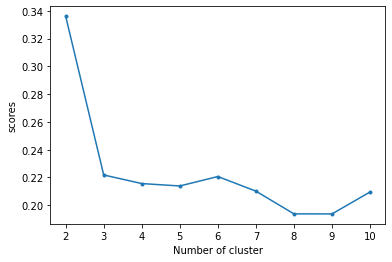

In [12]:
plt.plot(range(2,11),silhouette_scores,marker = '.')
plt.xlabel('Number of cluster')
plt.ylabel('scores')

In [13]:
km = KMeans(n_clusters=2)
km.fit(scaled)
silhouette_score(scaled,km.labels_)

0.3360888688789835

In [14]:
silhouette_scores1 = []
for k in range(2,11):
 db = DBSCAN(min_samples =k)
 db.fit(scaled)
 silhouette_scores1.append(silhouette_score(scaled,db .labels_))

Text(0, 0.5, 'scores')

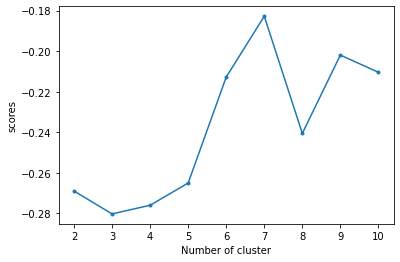

In [15]:
plt.plot(range(2,11),silhouette_scores1,marker = '.')
plt.xlabel('Number of cluster')
plt.ylabel('scores')

In [16]:
dbs = DBSCAN(eps=0.5,min_samples=7)
dbs.fit(scaled)
silhouette_score(scaled,dbs.labels_)

-0.18275450474361343

In [17]:
dbs = DBSCAN(eps = 0.5, min_samples = 7).fit(scaled)
silhouette_score(scaled, dbs.labels_)

-0.18275450474361343

In [18]:
silhouette_scores2 = []
for l in range(2,11):
 hc = AgglomerativeClustering(n_clusters=l)
 hc.fit(scaled)
 silhouette_scores2.append(silhouette_score(scaled,hc.labels_))

Text(0, 0.5, 'scores')

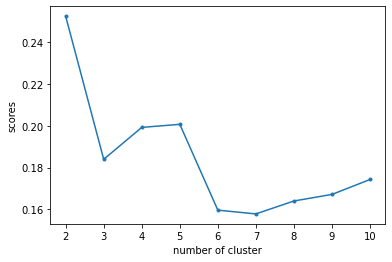

In [19]:
plt.plot(range(2,11),silhouette_scores2,marker='.')
plt.xlabel('number of cluster')
plt.ylabel('scores')

In [20]:
hcc = AgglomerativeClustering(n_clusters=2)
hcc.fit(scaled)
silhouette_score(scaled,hcc.labels_)

0.2525749652974333

I can see Kmeans have best silhoute score so Kmean is best clusterin algorithm.